<img style="float: left; margin: 30px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="125" height="160" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Luis Antonio Barriga Adame y Emiliano Mena González.

**Fecha:** 25 de abril del 2023.

**Expediente** : 730512 y 728407.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/EmilianoMena/ProyectoModulo2_BarrigaLA_MenaE

# Proyecto TEMA-2

# Estimación de los puntos para la siguiente temporada del Milan

## Objetivos

Objetivo general: 
- Obtener el número de puntos que generará el Milan la siguiente temporada de la Serie A

Objetivos específicos:
- Simular los goles del equipo local en el primer tiempo
- Simular los goles del equipo local en el segundo tiempo
- Simular los goles del equipo visitante en el primer tiempo
- Simular los goles del equipo visitante en el segundo tiempo
- Calcular los puntos generados por el equipo local 
- Calcular los puntos generados por el equipo visitante

## Definición del Proyecto
Se debe describir en una cuartilla máximo cuál es el escenario de negocio que se va a modelar, identificar cuáles son los supuestos que defines en el negocio y cuáles son los "nodos" o "escenarios" que identificas necesarios simular y porqué. Debes elaborar un diagrama de inicio a fin, identificando los "nodos" o "escenarios" a simular.

El escenario que se va a modelar es el puntuaje de un equipo de futbol para una temporada. Para ello se seleccionó al equipo AC Milan de la Serie A (liga nacional de Italia) y se modelarán los puntos que obtendra para la temporada 2022/2023. Primero es importante saber que la Serie A es una liga en la que participan 20 equipos (incluyendo al AC Milan) y el formato de competencia que se tiene es de todos contra todos en ida y vuelta, osea que cada equipo jugará contra los otros 19 equipos 2 partidos (en uno serán locales y en el otro visitantes). Considerando esto se sabe que la temporada consta de 38 jornadas (puesto que cada equipo jugara 38 partidos).

Ahora en cada partido se tienen 2 tiempos (primer y segundo tiempo) de 45 minutos cada uno, el equipo que al final de los 90 minutos anote más goles ganará el partido y con ello conseguirá 3 puntos, en caso de que ambos equipos anoten la misma cantidad de puntos cada equipo conseguirá 1 punto y el equipo que anote menos goles perderá y no conseguirá puntos.

Después de cada jornada se actualizá la tabla de los equipos y al final de la temporada se tiene en la tabla la suma de todos los puntos obtenidos por cada equipo.

Los nodos que se identificaron para la solución del problema son los siguientes:

1. Partidos de local o de visitante.
1. Goles del equipo local en el primer tiempo.
2. Goles del equipo local en el segundo tiempo.
3. Goles del equipo visitante en el primer tiempo.
4. Goles del equipo visitante en el segundo tiempo.
5. Puntos del equipo local y visitante.

A continuación se muestra el diagrama del problema:

<img style="float: left; margin: 30px 15px 15px 15px;" src="Diagrama.png" width="900" height="1200" /> 

## Nodos y Variables

Como se aprecia en el diagrama del modelo del problema primero se parte de que hay dos escenarios (partidos de visitante o partidos de local) dentro de cada escenario se tienen 4 nodos que son los elegidos para la simulación. Estos nodos son:

1. Goles del equipo local en el primer tiempo.
2. Goles del equipo local en el segundo tiempo.
3. Goles del equipo visitante en el primer tiempo.
4. Goles del equipo visitante en el segundo tiempo.

La selección de los nodos fue por que al simular estos se puede obtener un resultado final del partido (sumando los goles de cada equipo del primer tiempo y del segundo tiempo) y una vez que se tengan los resultados lo que resta es asignar los puntos dependiendo el marcador y finalmente sumar los puntos al equipo ya sean los de local o visitante dependiendo de como jugaron.

## Definición de hipotesis y supuestos
Algunos supuestos del modelo son:
- Los goles de cada equipo y en cada tiempo tienen su propia probabilidad por lo que cada uno se tiene que simular por aparte.
- El resultado final de cada encuentro es la suma de los goles de cada equipo en ambos tiempos.
- Los puntos se asignan en base al resultado (ganar 3 puntos, empate 1 punto y perder 0 puntos)
- Se espera que al ser locales ganen más partidos que cuando son visitantes.

## Obtención de bases de datos
Se obtuvo una base de datos de Kaggle con los datos de cada partido de la Serie desde la temporada 2005/2006 hasta la 2021/2022 (en total 17 temporadas). En esta base de datos viene:

- Temporada
- Jornada o ronda 
- Equipo local 
- Equipo visitante
- Goles del equipo local
- Goles del equipo visitante
- Goles del equipo local al final del primer tiempo
- Goles del equipo visitante al final del primer tiempo

Se realizó una limpieza de datos de todos los partidos de la temporada 2022/2023 pues esta no cuenta con todos los datos. Y se agregaron nuevas columnas de datos que son importantes para la simulación, estas son:

- Goles del equipo local al final del segundo tiempo
- Goles del equipo visitante al final del segundo tiempo
- Puntos obtenidos por el equipo local
- Puntos obtenidos por el equipo visitante

A continuación se muestra la base de datos.

In [1]:
# Librerias y dependencias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st   

In [2]:
# Cargar la base de datos
data = pd.read_csv("Serie_A.csv", index_col="Season")
# Limpieza de los datos (Eliminar datos de la temporada 2022/2023 pués aún no termina la temporada)
data = data.drop([22])
# Agregar los goles del local y visitante en el segundo tiempo (Goles al final del partido - Goles al final del medio tiempo)
data["Home SH Goals"] = data["Home Goals"] - data["Home FH Goals"]
data["Away SH Goals"] = data["Away Goals"] - data["Away FH Goals"]
# Agregar los puntos obtenidos por partido del equipo local y visitante
data["Home Points"] = np.select([(data["Home Goals"]>data["Away Goals"]), (data["Home Goals"]==data["Away Goals"]),
    (data["Home Goals"]<data["Away Goals"])],[3,1,0])
data["Away Points"] = np.select([(data["Away Goals"]>data["Home Goals"]), (data["Away Goals"]==data["Home Goals"]),
    (data["Away Goals"]<data["Home Goals"])],[3,1,0])
# Mostrar el Dataset
data

,Round,Home Team,Away Team,Home Goals,Away Goals,Home FH Goals,Away FH Goals,Home SH Goals,Away SH Goals,Home Points,Away Points
Season,,,,,,,,,,,
5,1,Chievo,Inter,2,2,2,1,0,1,1,1
5,1,Milan,Livorno,2,2,1,1,1,1,1,1
5,1,Parma,Messina,0,0,0,0,0,0,1,1
5,1,Roma,Fiorentina,1,0,0,0,1,0,3,0
5,1,Atalanta,Lecce,2,2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
21,38,Bologna,Juventus,1,4,0,3,1,1,0,3
21,38,Torino,Benevento,1,1,1,0,0,1,1,1
21,38,Napoli,Hellas Verona,1,1,0,0,1,1,1,1


In [3]:
# Separar los datos para el AC Milan en sus partidos como local
local = data[data["Home Team"] == "Milan"]
# Separar los datos para el AC Milan en sus partidos como visitante
visitante = data[data["Away Team"] == "Milan"]

## Simulación de los nodos

Definir los nodos que se simularán, en este caso se separan en dos grupos (los nodos de partidos como local y los nodos como partidos de visitantes). Son en total 8 nodos.

In [4]:
# Nodos para los partidos de local
nodo1 = local["Home FH Goals"].values
nodo2 = local["Away FH Goals"].values
nodo3 = local["Home SH Goals"].values
nodo4 = local["Away SH Goals"].values
# Nodos para los partidos de visitante
nodo5 = visitante["Home FH Goals"].values
nodo6 = visitante["Away FH Goals"].values
nodo7 = visitante["Home SH Goals"].values
nodo8 = visitante["Away SH Goals"].values
# Lista de los nodos
lista = ["Home FH Goals", "Away FH Goals", "Home SH Goals", "Away SH Goals"]

### Generación de variables discretas en base a los datos

Como los valores de los nodos se distribuyen de forma discreta, directamente se descarta el Kernel Density Estimation para obtener la función de probabilidad y generamos directamente las variables aleatorias discretas en base a la probabilidad acumulada de cada nodo.

In [5]:
# Transformada inversa para generar variables discretas
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    # Generar los números uniformes
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    # Resultado
    return y

In [6]:
# Gráfica de histograma de variables discretas
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    plt.figure(figsize=[10,4])
    y, bins = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(list(set(distribucion)), y, label=label)
    plt.legend()
    plt.show()

Primero se trabajarán los nodos de partidos de local (del nodo 1 al nodo 4)

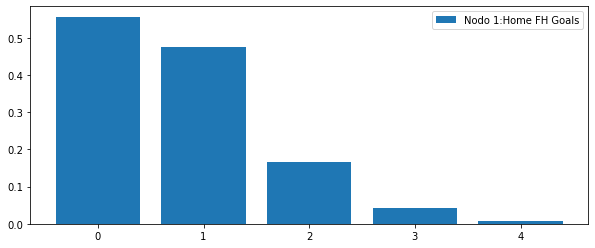

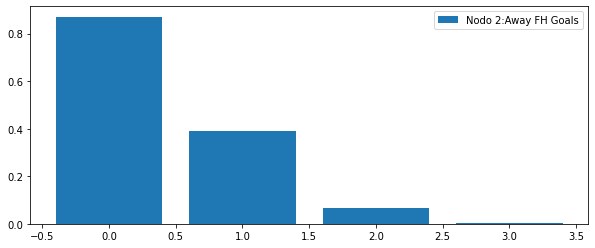

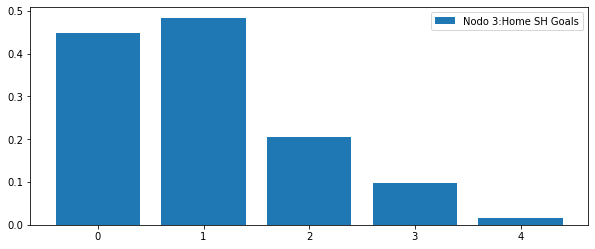

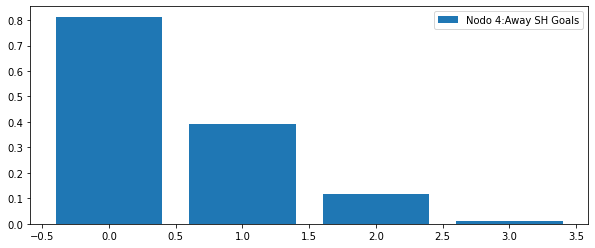

In [42]:
# Gráficas de los nodos 1, 2, 3, 4
nodos_local = [nodo1, nodo2, nodo3, nodo4] # Datos de cada nodo
label_local = ["Nodo 1:Home FH Goals", "Nodo 2:Away FH Goals", "Nodo 3:Home SH Goals", "Nodo 4:Away SH Goals"]
list(map(lambda dist, label: plot_histogram_discrete(dist, label), nodos_local, label_local));

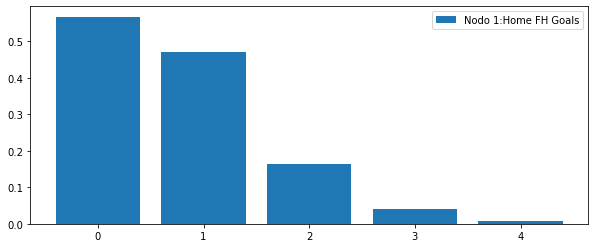

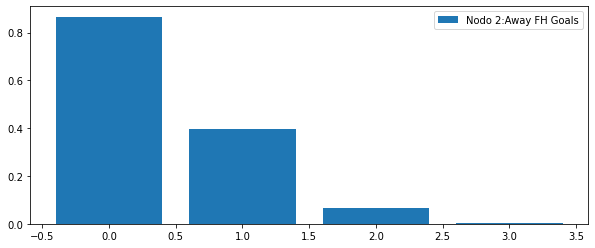

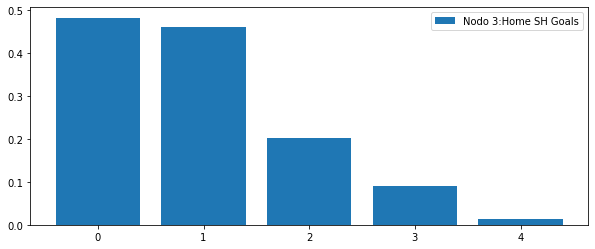

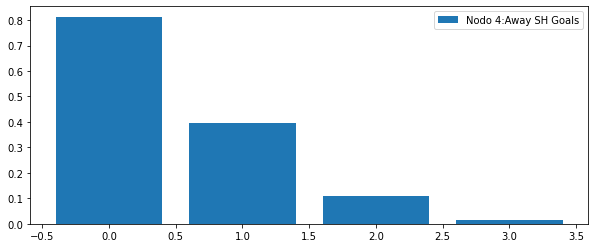

In [43]:
# Generar las variables de los partidos de local
N = 10000
val_local = [sorted(local[i].unique()) for i in lista] # Indices de cada nodo
p_ocur_local = list(map(lambda i, k: local.value_counts([i]).values / len(k), lista, nodos_local)) # Probabilidad de ocurrencia
p_acum_local = [np.cumsum(i) for i in p_ocur_local] # Probabilidad acumulada
dist_local = list(map(lambda p_acum, indices: Gen_distr_discreta(p_acum, indices, N), p_acum_local, val_local)) # Generación de las variables
# Mostrar las gráficas
list(map(lambda dist, label: plot_histogram_discrete(dist, label), dist_local, label_local));

Se puede ver los histogramas con la generación de 10,000 valores como se ajusta de buena forma a los valores originales que estan en la parte superior.

Ahora se trabaján los nodos para los partidos de visitante (5, 6, 7, 8)

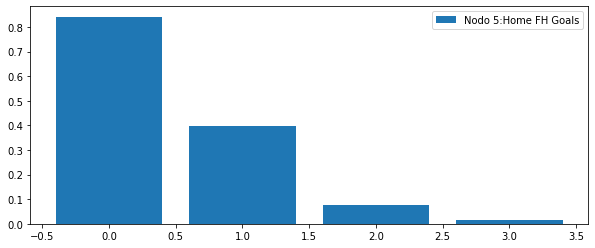

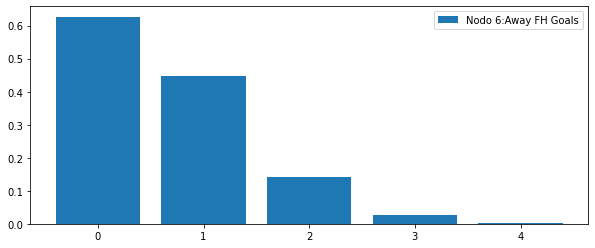

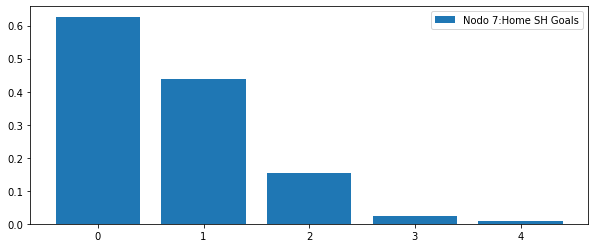

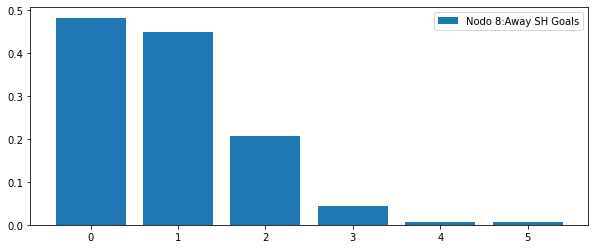

In [44]:
# Gráficas de los nodos 5, 6, 7, 8
nodos_visitante = [nodo5, nodo6, nodo7, nodo8] # Datos de cada nodo
label_visitante = ["Nodo 5:Home FH Goals", "Nodo 6:Away FH Goals", "Nodo 7:Home SH Goals", "Nodo 8:Away SH Goals"]
list(map(lambda dist, label: plot_histogram_discrete(dist, label), nodos_visitante, label_visitante));

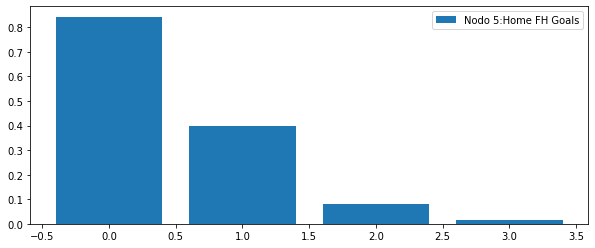

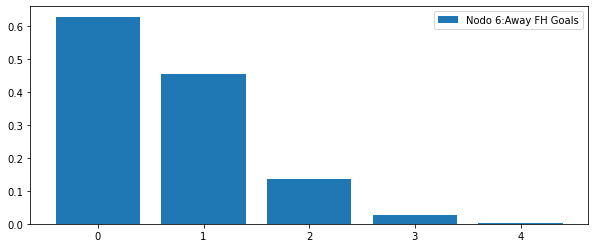

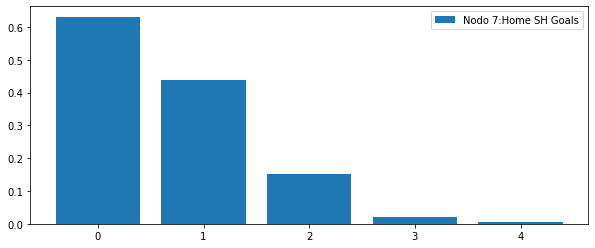

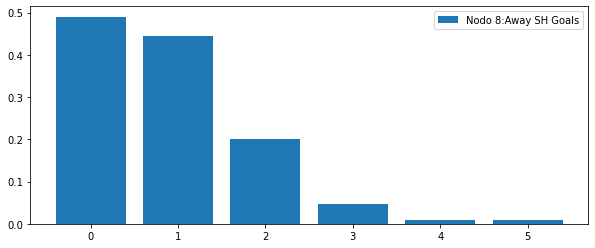

In [45]:
# Generar las variables de los partidos de visitante
val_visitante = [sorted(visitante[i].unique()) for i in lista] # Indices de cada nodo
p_ocur_visitante = list(map(lambda i, k: visitante.value_counts([i]).values / len(k), lista, nodos_visitante)) # Probabilidad de ocurrencia
p_acum_visitante = [np.cumsum(i) for i in p_ocur_visitante] # Probabilidad acumulada
dist_visitante = list(map(lambda p_acum, indices: Gen_distr_discreta(p_acum, indices, N), p_acum_visitante, val_visitante)) # Generación de las variables
# Mostrar las gráficas
list(map(lambda dist, label: plot_histogram_discrete(dist, label), dist_visitante, label_visitante));

### Reducción de varianza

Para reducir la varianza en la generación de las variables discretas, primero modificaremos la función de generación de variables discretas. Ahora las variables aleatorias se definiran fuera de la función. Para estas variables aleatorias aplicaremos la reducción de varianza de complementarios.

In [11]:
def Gen_distr_discreta_mod(
    p_acum: 'P.Acumulada de la distribución a generar',
    indices: 'valores reales a generar aleatoriamente',
    N: 'cantidad de números aleatorios a generar', 
    U: 'Variables aleatorias'
):
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    return y

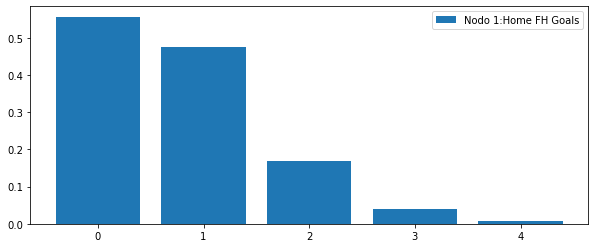

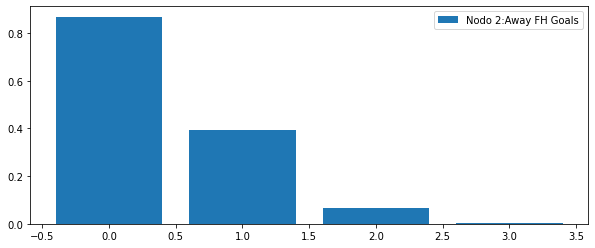

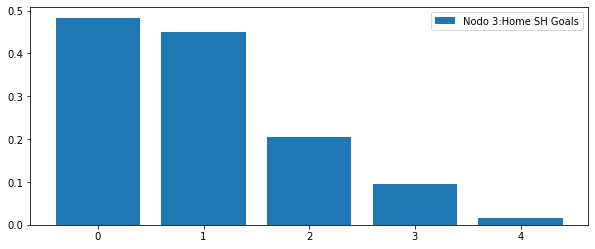

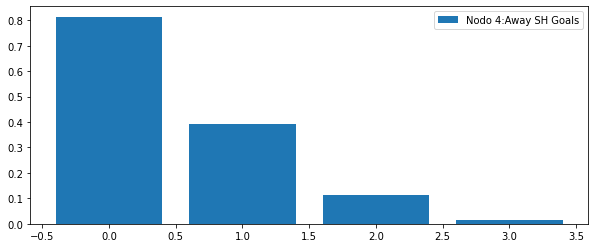

In [46]:
u = np.random.rand(N) # Variables aleatorias
u_c = 1 - u # Complemento de las variables aleatorias
U_estra = np.concatenate([u, u_c]) # Nuevas variables aleatorias
dist_local_estra = list(map(lambda p_acum, indices: Gen_distr_discreta_mod(p_acum, indices, N, U_estra), p_acum_local, val_local))
list(map(lambda dist, label: plot_histogram_discrete(dist, label), dist_local_estra, label_local));

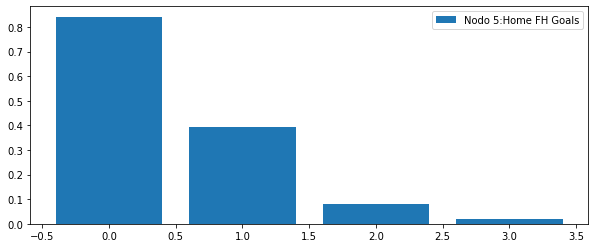

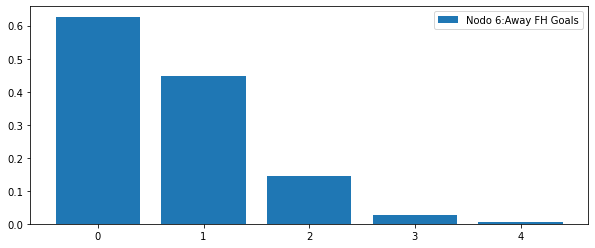

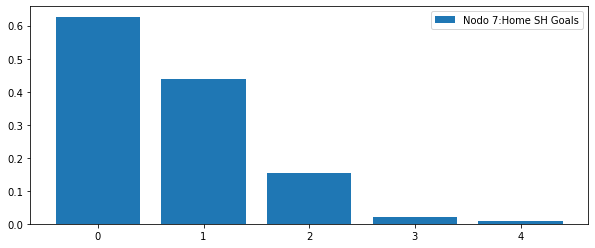

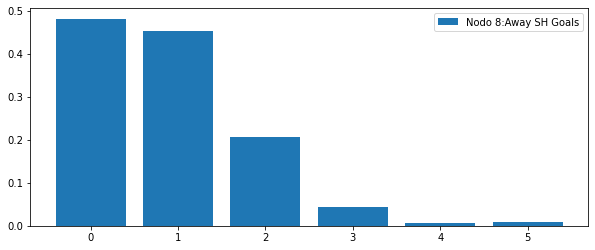

In [47]:
dist_visitante_estra = list(map(lambda p_acum, indices: Gen_distr_discreta_mod(p_acum, indices, N, U_estra), p_acum_visitante, val_visitante))
list(map(lambda dist, label: plot_histogram_discrete(dist, label), dist_visitante_estra, label_visitante));

Se ve un mejor ajuste ahora en los nodos con la reducción de varianza con números complementarios.

### Simular

Simulamos ambos procesos (partidos de local y de visitante)

In [14]:
sim_local = list(map(lambda p_acum, indices: Gen_distr_discreta_mod(p_acum, indices, N, U_estra), p_acum_local, val_local))
sim_visitante = list(map(lambda p_acum, indices: Gen_distr_discreta_mod(p_acum, indices, N, U_estra), p_acum_visitante, val_visitante))

Empezamos con los partidos de local, una vez que se simulan los cuatro nodos que influyen se suman los nodos de goles de cada tiempo para cada equipo (local y visitante). Luego se le asignan los puntos a cada equipo dependiendo de cuantos goles obtuvo cada equipo.

In [39]:
sim_local_df = pd.DataFrame(sim_local).T
sim_local_df.columns = lista
sim_local_df["Home Goals"] = sim_local_df["Home FH Goals"] + sim_local_df["Home SH Goals"]
sim_local_df["Away Goals"] = sim_local_df["Away FH Goals"] + sim_local_df["Away SH Goals"]
sim_local_df["Home Points"] = np.select([(sim_local_df["Home Goals"]>sim_local_df["Away Goals"]), 
                                             (sim_local_df["Home Goals"]==sim_local_df["Away Goals"]),
                                             (sim_local_df["Home Goals"]<sim_local_df["Away Goals"])],[3,1,0])
sim_local_df["Away Points"] = np.select([(sim_local_df["Away Goals"]>sim_local_df["Home Goals"]), 
                                             (sim_local_df["Away Goals"]==sim_local_df["Home Goals"]),
                                             (sim_local_df["Away Goals"]<sim_local_df["Home Goals"])],[3,1,0])
sim_visitante_df.index.name = "Simulaciones"
sim_local_df

,Home FH Goals,Away FH Goals,Home SH Goals,Away SH Goals,Home Goals,Away Goals,Home Points,Away Points
0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,1
3,1,1,1,1,2,2,1,1
4,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,1,1
19996,0,0,0,0,0,0,1,1
19997,0,0,0,0,0,0,1,1
19998,0,0,0,0,0,0,1,1


En este caso los puntos que nos importan son los del equipo local (Home Points) pues es como juega Milan estos partidos. A continuación se obtuvo la probabilidad después de las simulaciones de cuantos puntos se obtienen para el Milan. Luego se multiplicó la probabilidad por los partidos que se juegan de local (19 partidos) y se obtuvieron los siguientes resultados.

In [25]:
puntos = [0, 1, 3]
partidos_local = [round((sim_local_df[sim_local_df["Home Points"] == i]["Home Points"].count() / 
                             sim_local_df["Home Points"].count())*19) for i in puntos]
df_local_final = pd.DataFrame({
    "Partidos": partidos_local,
    "Puntos": puntos,
})
df_local_final.index = ["Perdido","Empatado","Ganado"]
df_local_final["Total"] = df_local_final["Partidos"]*df_local_final["Puntos"]

df_local_final

,Partidos,Puntos,Total
Perdido,0,0,0
Empatado,9,1,9
Ganado,10,3,30


Después de las 10,000 simulaciones se obtuvo una pequeña ventaja a ganar los partidos, seguido por los empates y con 0% de probabilidad de perder. 

Ahora repetimos el proceso pero con los partidos del Milan como visitante

In [41]:
sim_visitante_df = pd.DataFrame(sim_visitante).T
sim_visitante_df.columns = lista
sim_visitante_df["Home Goals"] = sim_visitante_df["Home FH Goals"] + sim_visitante_df["Home SH Goals"]
sim_visitante_df["Away Goals"] = sim_visitante_df["Away FH Goals"] + sim_visitante_df["Away SH Goals"]
sim_visitante_df["Home Points"] = np.select([(sim_visitante_df["Home Goals"]>sim_visitante_df["Away Goals"]), 
                                             (sim_visitante_df["Home Goals"]==sim_visitante_df["Away Goals"]),
                                             (sim_visitante_df["Home Goals"]<sim_visitante_df["Away Goals"])],[3,1,0])
sim_visitante_df["Away Points"] = np.select([(sim_visitante_df["Away Goals"]>sim_visitante_df["Home Goals"]), 
                                             (sim_visitante_df["Away Goals"]==sim_visitante_df["Home Goals"]),
                                             (sim_visitante_df["Away Goals"]<sim_visitante_df["Home Goals"])],[3,1,0])

sim_visitante_df.index.name = "Simulaciones"
sim_visitante_df

,Home FH Goals,Away FH Goals,Home SH Goals,Away SH Goals,Home Goals,Away Goals,Home Points,Away Points
Simulaciones,,,,,,,,
0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,1
3,1,1,1,1,2,2,1,1
4,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,1,1
19996,0,0,0,0,0,0,1,1
19997,0,0,0,0,0,0,1,1


In [27]:
partidos_visitante = [round((sim_visitante_df[sim_visitante_df["Away Points"] == i]["Away Points"].count() / 
                             sim_visitante_df["Away Points"].count())*19) for i in puntos]
df_visitante_final = pd.DataFrame({
    "Partidos": partidos_visitante,
    "Puntos": puntos,
})
df_visitante_final.index = ["Perdido","Empatado","Ganado"]
df_visitante_final["Total"] = df_visitante_final["Partidos"]*df_visitante_final["Puntos"]
df_visitante_final

,Partidos,Puntos,Total
Perdido,0,0,0
Empatado,11,1,11
Ganado,8,3,24


Finalmente juntamos ambas simulaciones de los partidos.

In [28]:
df_final = pd.concat([df_local_final, df_visitante_final], keys=["Local", "Visitante"], axis=1)
df_final

Local              Visitante             
         Partidos Puntos Total  Partidos Puntos Total
Perdido         0      0     0         0      0     0
Empatado        9      1     9        11      1    11
Ganado         10      3    30         8      3    24

In [20]:
puntos_finales = (df_final["Local"]["Total"] + df_final["Visitante"]["Total"]).sum()
print(f"Al final de las simulaciones se obtuvo que la cantidad de puntos que se espera para la siguiente temporada del Milan son {puntos_finales}")

Al final de las simulaciones se obtuvo que la cantidad de puntos que se espera para la siguiente temporada del Milan son 74


## Conclusiones y Visualización de Resultados

Para concluir podemos decir que despues de realizar las 10,000 simulaciones y sacar las probabilidades para interpretarlas mejor, primero en los locales no hubo probabilidades de que pierdan partidos, 52.63% de que ganen y 47.36% de que queden empate, y en las simulaciones de visitantes, tampoco hubo probabilidades de que pierdan, 57.89% de que empaten y 42.10% de que ganen.
Y en conclusion de todo esto y contando los puntos por partido empatado y ganado, se espera que para la siguiente temporada del Milan obtengan 74 puntos en total.